In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import dask.dataframe as dd
import os

In [ ]:

pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)        
pd.set_option('display.max_colwidth', 30)   

print("Loading NOAA Storm Events data...")
# Load the NOAA storm events data
storm = pd.read_csv('/kaggle/input/dynamic-rhythms-train-data/NOAA_StormEvents/StormEvents_2014_2024.csv')

Loading NOAA Storm Events data...


In [4]:
print(f"Original dataset shape: {storm.shape}")
storm.head(5)

Original dataset shape: (691434, 51)


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201402,18,1000,201402,18,2000,83473,503953,NEW HAMPSHIRE,33,2014,February,Heavy Snow,Z,12,EASTERN HILLSBOROUGH,BOX,18-FEB-14 10:00:00,EST-5,18-FEB-14 20:00:00,0,0,0,0,0.00K,0.00K,Trained Spotter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low pressure developing so...,Eight to twelve inches of ...,CSV
1,201403,30,831,201403,30,931,83971,507163,MASSACHUSETTS,25,2014,March,Flood,C,17,MIDDLESEX,BOX,30-MAR-14 08:31:00,EST-5,30-MAR-14 09:31:00,0,0,0,0,35.00K,0.00K,Amateur Radio,NaN,NaN,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,WNW,CHELMSFORD CENTER,1.0,WNW,CHELMSFORD CENTER,42.5861,-71.3472,42.5867,-71.3469,A stacked low pressure sys...,Boston Road was closed nea...,CSV
2,201404,27,2306,201404,27,2306,83517,506236,MISSOURI,29,2014,April,Hail,C,67,DOUGLAS,SGF,27-APR-14 23:06:00,CST-6,27-APR-14 23:06:00,0,0,0,0,0.00K,0.00K,Trained Spotter,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,W,AVA,1.0,W,AVA,36.9500,-92.6600,36.9500,-92.6600,A powerful storm system an...,NaN,CSV
3,201404,27,2303,201404,27,2303,83517,506237,MISSOURI,29,2014,April,Thunderstorm Wind,C,67,DOUGLAS,SGF,27-APR-14 23:03:00,CST-6,27-APR-14 23:03:00,0,0,0,0,10.00K,0.00K,Emergency Manager,61.00,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,W,AVA,1.0,W,AVA,36.9500,-92.6600,36.9500,-92.6600,A powerful storm system an...,Several power poles snappe...,CSV
4,201402,15,1300,201402,15,2100,83132,501499,WASHINGTON,53,2014,February,High Wind,Z,20,SOUTHWEST INTERIOR,PQR,15-FEB-14 13:00:00,PST-8,15-FEB-14 21:00:00,0,0,0,0,0.00K,0.00K,Official NWS Observations,75.00,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong cold front produc...,Two stations measured stro...,CSV


In [5]:
storm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691434 entries, 0 to 691433
Data columns (total 51 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   BEGIN_YEARMONTH     691434 non-null  int64  
 1   BEGIN_DAY           691434 non-null  int64  
 2   BEGIN_TIME          691434 non-null  int64  
 3   END_YEARMONTH       691434 non-null  int64  
 4   END_DAY             691434 non-null  int64  
 5   END_TIME            691434 non-null  int64  
 6   EPISODE_ID          691434 non-null  int64  
 7   EVENT_ID            691434 non-null  int64  
 8   STATE               691434 non-null  object 
 9   STATE_FIPS          691434 non-null  int64  
 10  YEAR                691434 non-null  int64  
 11  MONTH_NAME          691434 non-null  object 
 12  EVENT_TYPE          691434 non-null  object 
 13  CZ_TYPE             691434 non-null  object 
 14  CZ_FIPS             691434 non-null  int64  
 15  CZ_NAME             691434 non-nul

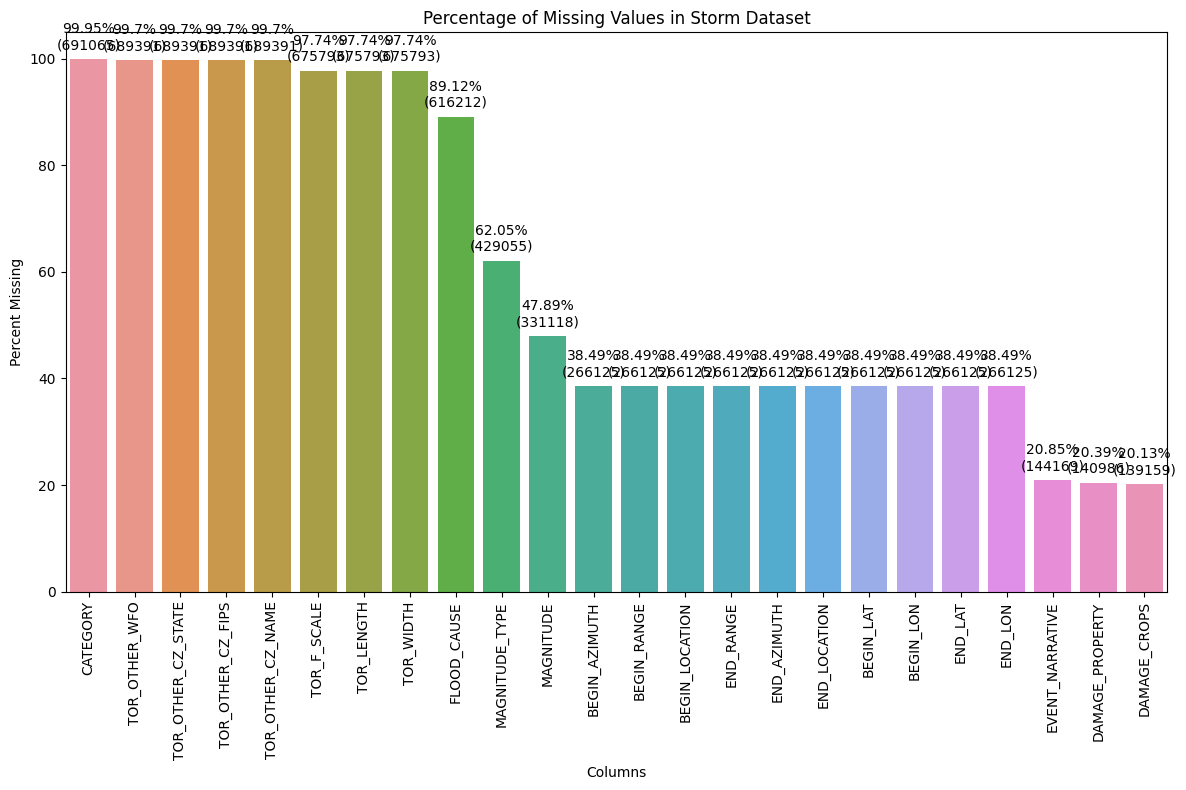

In [ ]:
""" 
Task: 
Calculate and visualize the missing values in the 'storm' dataset.

Steps:
1. Calculate the number and percentage of missing values for each column.
2. Create a DataFrame to organize missing value counts and percentages.
3. Filter to show only columns that have missing data.
4. Plot a bar chart showing the percentage of missing values per column.
5. Annotate each bar with both the percentage and the raw count of missing entries for clarity.
"""

missing_values = storm.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(storm) * 100).round(2)


missing_df = pd.DataFrame({'Count': missing_values, 'Percent': missing_percent})
missing_df = missing_df[missing_df['Count'] > 0]  # Only show columns with missing values


plt.figure(figsize=(12, 8))
ax = sns.barplot(x=missing_df.index, y='Percent', data=missing_df)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Percent Missing')
plt.title('Percentage of Missing Values in Storm Dataset')


for i, p in enumerate(ax.patches):
    ax.annotate(f"{missing_df['Percent'].iloc[i]}%\n({missing_df['Count'].iloc[i]})", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom',
                xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()
plt.show()


In [ ]:
def convert_damage_to_number(value):
    """
Converts a string representing damage amount (for property and crops) to a numeric value.

Parameters:
    value (str or float): The string representing the damage amount. It can be a number, 
    a number with a suffix (K, M, B), or NA.

Returns:
    float: The numeric value of the damage amount. If the input is NA or cannot be converted, returns 0.
"""

    if pd.isna(value):
        return 0
    
    value = str(value).strip()
    
    if value == '0' or value == '0.00K' or value == '0.0':
        return 0
    
    multiplier = 1
    if value.endswith('K'):
        multiplier = 1000
        value = value[:-1]
    elif value.endswith('M'):
        multiplier = 1000000
        value = value[:-1]
    elif value.endswith('B'):
        multiplier = 1000000000
        value = value[:-1]
        
    try:
        return float(value) * multiplier
    except ValueError:
        return 0


storm['DAMAGE_PROPERTY'] = storm['DAMAGE_PROPERTY'].apply(convert_damage_to_number)
storm['DAMAGE_CROPS'] = storm['DAMAGE_CROPS'].apply(convert_damage_to_number)

# Display the first few rows of the converted columns
print("Converted damage values:")
print(storm[['DAMAGE_PROPERTY', 'DAMAGE_CROPS']].head(10))


print("\nSummary statistics for damage columns:")
print(storm[['DAMAGE_PROPERTY', 'DAMAGE_CROPS']].describe())


Converted damage values:
   DAMAGE_PROPERTY  DAMAGE_CROPS
0              0.0           0.0
1          35000.0           0.0
2              0.0           0.0
3          10000.0           0.0
4              0.0           0.0
5              0.0           0.0
6              0.0           0.0
7              0.0           0.0
8              0.0           0.0
9              0.0           0.0

Summary statistics for damage columns:
       DAMAGE_PROPERTY  DAMAGE_CROPS
count     6.914340e+05  6.914340e+05
mean      3.596199e+05  2.494144e+04
std       3.602821e+07  2.470467e+06
min       0.000000e+00  0.000000e+00
25%       0.000000e+00  0.000000e+00
50%       0.000000e+00  0.000000e+00
75%       0.000000e+00  0.000000e+00
max       1.700000e+10  1.500000e+09


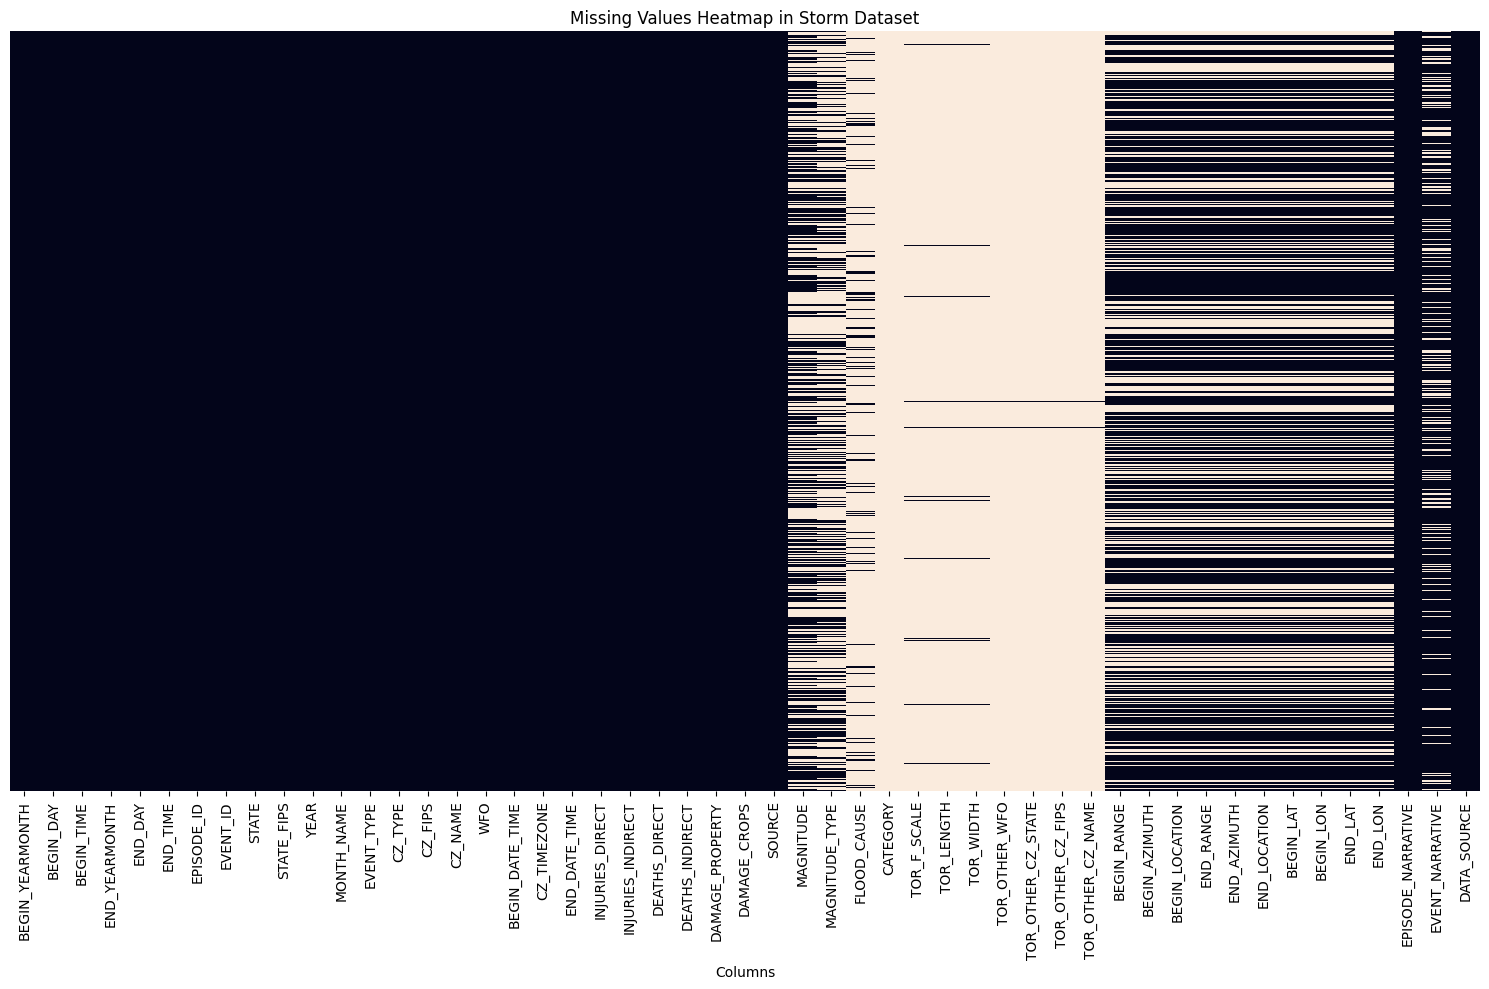

In [ ]:
#Analyze the missing values in the dataset using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(storm.isnull(), cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap in Storm Dataset')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
print("MAGNITUDE_TYPE distribution:")
print(storm['MAGNITUDE_TYPE'].value_counts())

MAGNITUDE_TYPE distribution:
MAGNITUDE_TYPE
EG    175976
MG     81371
MS      4633
ES       399
Name: count, dtype: int64


In [ ]:
#dropping the columns with high missing values
columns_to_drop = [
    'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 
    'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME',
    'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
    'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'EVENT_NARRATIVE'
]


storm = storm.drop(columns=columns_to_drop)


print(f"Dataset shape after dropping columns: {storm.shape}")

Dataset shape after dropping columns: (691434, 31)


In [ ]:
"""
Task:
Create unified datetime columns ('start_datetime' and 'end_datetime') in the storm dataset 
by merging year, month, day, and time components.

Steps:
1. Convert 'BEGIN_YEARMONTH', 'BEGIN_DAY', and 'BEGIN_TIME' columns into a single datetime string.
2. Use 'pd.to_datetime' with the specified format ('%Y%m%d%H%M') to parse the string into a proper datetime object.
3. Repeat the same process for 'END_YEARMONTH', 'END_DAY', and 'END_TIME' columns to create 'end_datetime'.
"""

storm['start_datetime'] = pd.to_datetime(
    storm['BEGIN_YEARMONTH'].astype(str) + 
    storm['BEGIN_DAY'].astype(str).str.zfill(2) + 
    storm['BEGIN_TIME'].astype(str).str.zfill(4),
    format='%Y%m%d%H%M'
)

storm['end_datetime'] = pd.to_datetime(
    storm['END_YEARMONTH'].astype(str) + 
    storm['END_DAY'].astype(str).str.zfill(2) + 
    storm['END_TIME'].astype(str).str.zfill(4),
    format='%Y%m%d%H%M'
)

# Add a duration column in hours
storm['duration_hours'] = (storm['end_datetime'] - storm['start_datetime']).dt.total_seconds() / 3600

# Display the new columns
print("Created datetime columns:")
print(storm[['start_datetime', 'end_datetime', 'duration_hours']].head())


Created datetime columns:
       start_datetime        end_datetime  duration_hours
0 2014-02-18 10:00:00 2014-02-18 20:00:00            10.0
1 2014-03-30 08:31:00 2014-03-30 09:31:00             1.0
2 2014-04-27 23:06:00 2014-04-27 23:06:00             0.0
3 2014-04-27 23:03:00 2014-04-27 23:03:00             0.0
4 2014-02-15 13:00:00 2014-02-15 21:00:00             8.0


In [ ]:
# Dropping additional columns that are not needed for analysis at this stage
columns_to_drop_additional = ['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 
                             'END_YEARMONTH', 'END_DAY', 'END_TIME', 
                             'BEGIN_DATE_TIME', 'END_DATE_TIME', 
                             'EPISODE_ID', 'EVENT_ID', 'DATA_SOURCE']


temporal_columns = ['start_datetime', 'end_datetime', 'duration_hours']
remaining_columns = [col for col in storm.columns 
                    if col not in temporal_columns + columns_to_drop_additional]
new_column_order = temporal_columns + remaining_columns

# Drop redundant columns and reorder
storm = storm.drop(columns=columns_to_drop_additional)[new_column_order]

print(f"Dataset shape after reorganization: {storm.shape}")
storm.head(5)

Dataset shape after reorganization: (691434, 23)


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,start_datetime,end_datetime,duration_hours,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,CZ_TIMEZONE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,EPISODE_NARRATIVE
0,2014-02-18 10:00:00,2014-02-18 20:00:00,10.0,NEW HAMPSHIRE,33,2014,February,Heavy Snow,Z,12,EASTERN HILLSBOROUGH,BOX,EST-5,0,0,0,0,0.0,0.0,Trained Spotter,NaN,NaN,Low pressure developing so...
1,2014-03-30 08:31:00,2014-03-30 09:31:00,1.0,MASSACHUSETTS,25,2014,March,Flood,C,17,MIDDLESEX,BOX,EST-5,0,0,0,0,35000.0,0.0,Amateur Radio,NaN,NaN,A stacked low pressure sys...
2,2014-04-27 23:06:00,2014-04-27 23:06:00,0.0,MISSOURI,29,2014,April,Hail,C,67,DOUGLAS,SGF,CST-6,0,0,0,0,0.0,0.0,Trained Spotter,0.88,NaN,A powerful storm system an...
3,2014-04-27 23:03:00,2014-04-27 23:03:00,0.0,MISSOURI,29,2014,April,Thunderstorm Wind,C,67,DOUGLAS,SGF,CST-6,0,0,0,0,10000.0,0.0,Emergency Manager,61.00,EG,A powerful storm system an...
4,2014-02-15 13:00:00,2014-02-15 21:00:00,8.0,WASHINGTON,53,2014,February,High Wind,Z,20,SOUTHWEST INTERIOR,PQR,PST-8,0,0,0,0,0.0,0.0,Official NWS Observations,75.00,EG,A strong cold front produc...


In [ ]:

print("Timezone distribution:")
print(storm['CZ_TIMEZONE'].value_counts())

# Convert start_datetime and end_datetime to Eastern Time
def convert_to_eastern(dt, timezone_str):
    """
    Task:
    Adjust a given datetime to Eastern Time (EST) based on the provided timezone information.

    Parameters:
    dt (datetime or pd.Timestamp): The original datetime to be converted.
    timezone_str (str): The timezone string indicating the original timezone of the datetime.

    Returns:
    datetime: Datetime adjusted to Eastern Time (EST). 
              If input is missing or timezone not recognized, returns the original datetime.
    """
    
    if pd.isna(dt) or pd.isna(timezone_str):
        return dt
    
    # Define timezone offsets in hours relative to Eastern Time (EST-5)
    timezone_offsets = {
        'EST-5': 0,     # Eastern Time (no offset)
        'CST-6': -1,    # Central Time (1 hour behind Eastern)
        'MST-7': -2,    # Mountain Time (2 hours behind Eastern)
        'PST-8': -3,    # Pacific Time (3 hours behind Eastern)
        'HST-10': -5,   # Hawaii Time (5 hours behind Eastern)
        'AST-4': 1,     # Atlantic Time (1 hour ahead of Eastern)
        'AKST-9': -4,   # Alaska Time (4 hours behind Eastern)
        'PDT-7': -2,    # Pacific Daylight Time (2 hours behind Eastern)
        'GST10': 15,    # Guam Standard Time (15 hours ahead of Eastern)
        'SST-11': -6,   # Samoa Standard Time (6 hours behind Eastern)
        'EDT-4': 1,     # Eastern Daylight Time (1 hour ahead of standard Eastern)
        'CDT-5': 0      # Central Daylight Time (same as Eastern Standard)
    }
    
    # Apply the offset
    offset_hours = timezone_offsets.get(timezone_str, 0)
    return dt + pd.Timedelta(hours=offset_hours)

"""
Task:
Convert original event datetimes into Eastern Time based on the given timezone, 
and recalculate the event duration accordingly.

Steps:
- Apply the `convert_to_eastern` function row-wise to adjust 'start_datetime' and 'end_datetime' into 'start_datetime_eastern' and 'end_datetime_eastern'.
- Recalculate 'duration_hours_eastern' based on the new Eastern Time values.
- Display the original and converted datetime values for verification.
"""

storm['start_datetime_eastern'] = storm.apply(
    lambda row: convert_to_eastern(row['start_datetime'], row['CZ_TIMEZONE']), 
    axis=1
)

storm['end_datetime_eastern'] = storm.apply(
    lambda row: convert_to_eastern(row['end_datetime'], row['CZ_TIMEZONE']), 
    axis=1
)


storm['duration_hours_eastern'] = (storm['end_datetime_eastern'] - storm['start_datetime_eastern']).dt.total_seconds() / 3600

# Show the first few rows with the original and converted times
print("Datetime conversion to Eastern Time:")
print(storm[['start_datetime', 'end_datetime', 'CZ_TIMEZONE', 
             'start_datetime_eastern', 'end_datetime_eastern', 'duration_hours_eastern']].head(5))


Timezone distribution:
CZ_TIMEZONE
CST-6     316821
EST-5     239137
MST-7      86243
PST-8      36630
HST-10      6695
AST-4       2648
AKST-9      2521
PDT-7        256
GST10        234
SST-11       195
EDT-4         36
CDT-5         18
Name: count, dtype: int64
Datetime conversion to Eastern Time:
       start_datetime        end_datetime CZ_TIMEZONE start_datetime_eastern end_datetime_eastern  duration_hours_eastern
0 2014-02-18 10:00:00 2014-02-18 20:00:00       EST-5    2014-02-18 10:00:00  2014-02-18 20:00:00                    10.0
1 2014-03-30 08:31:00 2014-03-30 09:31:00       EST-5    2014-03-30 08:31:00  2014-03-30 09:31:00                     1.0
2 2014-04-27 23:06:00 2014-04-27 23:06:00       CST-6    2014-04-27 22:06:00  2014-04-27 22:06:00                     0.0
3 2014-04-27 23:03:00 2014-04-27 23:03:00       CST-6    2014-04-27 22:03:00  2014-04-27 22:03:00                     0.0
4 2014-02-15 13:00:00 2014-02-15 21:00:00       PST-8    2014-02-15 10:00:00  2014-02-15

In [14]:
desired_order = [
    'start_datetime', 'end_datetime', 
    'start_datetime_eastern', 'end_datetime_eastern'
]

# Add remaining columns (excluding duration_hours_eastern)
remaining_cols = [col for col in storm.columns 
                 if col not in desired_order and col != 'duration_hours_eastern']
new_order = desired_order + remaining_cols

# Reorganize the DataFrame with the new column order
storm = storm[new_order]

# Display the first few rows to verify the new structure
print(f"New dataframe shape after reorganization: {storm.shape}")

# Drop YEAR and MONTH_NAME columns as they can be derived from datetime columns
storm = storm.drop(columns=['YEAR', 'MONTH_NAME'])

# Display the dataframe shape after dropping columns
print(f"Dataset shape after dropping YEAR and MONTH_NAME: {storm.shape}")

New dataframe shape after reorganization: (691434, 25)
Dataset shape after dropping YEAR and MONTH_NAME: (691434, 23)


In [ ]:
"""
Task:
Impute missing 'MAGNITUDE' and 'MAGNITUDE_TYPE' values using machine learning models.

Steps:
1. Analyze relationship between 'EVENT_TYPE' and 'MAGNITUDE'/'MAGNITUDE_TYPE'.
2. Train a RandomForestRegressor to predict missing 'MAGNITUDE' values.
3. Train a RandomForestClassifier to predict missing 'MAGNITUDE_TYPE' values.
4. Add imputed values back to the main dataset.
"""

print("Imputing MAGNITUDE and MAGNITUDE_TYPE values...")
# First, let's analyze the relationship between EVENT_TYPE and MAGNITUDE/MAGNITUDE_TYPE
event_magnitude_analysis = storm.groupby('EVENT_TYPE')[['MAGNITUDE', 'MAGNITUDE_TYPE']].agg(
    {'MAGNITUDE': ['mean', 'median', 'count'], 'MAGNITUDE_TYPE': lambda x: x.value_counts().index[0] if len(x.value_counts()) > 0 else None}
).reset_index()

# Flatten the multi-index columns
event_magnitude_analysis.columns = ['EVENT_TYPE', 'MAGNITUDE_MEAN', 'MAGNITUDE_MEDIAN', 'MAGNITUDE_COUNT', 'MOST_COMMON_TYPE']

# Display the analysis
print("Analysis of MAGNITUDE and MAGNITUDE_TYPE by EVENT_TYPE:")
print(event_magnitude_analysis.sort_values('MAGNITUDE_COUNT', ascending=False).head(10))

# Create imputation model for MAGNITUDE using other relevant features
# Select features for imputation model
features = ['EVENT_TYPE', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'INJURIES_DIRECT', 
            'DEATHS_DIRECT', 'duration_hours', 'STATE', 'CZ_TYPE']

# Create label encoders for all data first (to include all categories)
label_encoders = {}
for col in ['EVENT_TYPE', 'STATE', 'CZ_TYPE']:
    le = LabelEncoder()
    le.fit(storm[col])  # Fit on ALL data, not just the non-null magnitude data
    label_encoders[col] = le

# Prepare dataset for training (only rows with MAGNITUDE)
magnitude_data = storm.dropna(subset=['MAGNITUDE'])[features + ['MAGNITUDE']].copy()

# Encode categorical variables using pre-fit encoders
for col in ['EVENT_TYPE', 'STATE', 'CZ_TYPE']:
    magnitude_data[col] = label_encoders[col].transform(magnitude_data[col])

# Train the model
X = magnitude_data[features]
y = magnitude_data['MAGNITUDE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Evaluate the model
score = rf_model.score(X_test, y_test)
print(f"\nR² score for MAGNITUDE prediction: {score:.4f}")

# Create a copy of storm dataframe for imputation
storm_imputed = storm.copy()

# Prepare data for prediction
missing_magnitude = storm[storm['MAGNITUDE'].isna()].copy()
for col in ['EVENT_TYPE', 'STATE', 'CZ_TYPE']:
    missing_magnitude[col] = label_encoders[col].transform(missing_magnitude[col])

# Make predictions for missing values
missing_magnitude_pred = rf_model.predict(missing_magnitude[features])

# Add imputed values to a new column
storm_imputed.loc[storm['MAGNITUDE'].isna(), 'MAGNITUDE_IMPUTED'] = missing_magnitude_pred
storm_imputed.loc[~storm['MAGNITUDE'].isna(), 'MAGNITUDE_IMPUTED'] = storm_imputed.loc[~storm['MAGNITUDE'].isna(), 'MAGNITUDE']

# Now for MAGNITUDE_TYPE - create a model to predict the type
# Filter data with both MAGNITUDE and MAGNITUDE_TYPE
type_data = storm.dropna(subset=['MAGNITUDE', 'MAGNITUDE_TYPE']).copy()

# Encode the target - fit on all available magnitude types first
le_type = LabelEncoder()
le_type.fit(storm['MAGNITUDE_TYPE'].dropna())
type_data['MAGNITUDE_TYPE_encoded'] = le_type.transform(type_data['MAGNITUDE_TYPE'])

# Features for type prediction (including MAGNITUDE)
type_features = features + ['MAGNITUDE']
X_type = type_data[type_features]
y_type = type_data['MAGNITUDE_TYPE_encoded']

# Encode categorical features again
for col in ['EVENT_TYPE', 'STATE', 'CZ_TYPE']:
    X_type[col] = label_encoders[col].transform(X_type[col])

# Split and train
X_type_train, X_type_test, y_type_train, y_type_test = train_test_split(X_type, y_type, test_size=0.2, random_state=42)

rf_type_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_type_model.fit(X_type_train, y_type_train)

# Evaluate
type_score = rf_type_model.score(X_type_test, y_type_test)
print(f"Accuracy for MAGNITUDE_TYPE prediction: {type_score:.4f}")

# Prepare data for prediction (using both original and imputed MAGNITUDE)
missing_type = storm[storm['MAGNITUDE_TYPE'].isna()].copy()

# Add the imputed magnitude to use for prediction
missing_type_with_magnitude = missing_type.copy()

# For rows that have original MAGNITUDE, use it; for others, use the imputed value
for col in ['EVENT_TYPE', 'STATE', 'CZ_TYPE']:
    missing_type_with_magnitude[col] = label_encoders[col].transform(missing_type_with_magnitude[col])

# Use MAGNITUDE if available, otherwise use the imputed values
missing_type_with_magnitude['MAGNITUDE'] = missing_type_with_magnitude['MAGNITUDE'].fillna(
    storm_imputed.loc[missing_type_with_magnitude.index, 'MAGNITUDE_IMPUTED'])

# Make predictions
missing_type_pred = rf_type_model.predict(missing_type_with_magnitude[type_features])

# Add predictions to dataframe
storm_imputed['MAGNITUDE_TYPE_IMPUTED'] = storm['MAGNITUDE_TYPE']
storm_imputed.loc[storm['MAGNITUDE_TYPE'].isna(), 'MAGNITUDE_TYPE_IMPUTED'] = le_type.inverse_transform(missing_type_pred)

# Show results
print("\nImputation results:")
print(f"Original data: {storm['MAGNITUDE'].count()} MAGNITUDE values and {storm['MAGNITUDE_TYPE'].count()} MAGNITUDE_TYPE values")
print(f"After imputation: {storm_imputed['MAGNITUDE_IMPUTED'].count()} MAGNITUDE_IMPUTED values and {storm_imputed['MAGNITUDE_TYPE_IMPUTED'].count()} MAGNITUDE_TYPE_IMPUTED values")

# Show sample of imputed values
print("\nSample of imputed values:")
sample_imputed = storm_imputed[storm['MAGNITUDE'].isna()].sample(5)[
    ['EVENT_TYPE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'MAGNITUDE_IMPUTED', 'MAGNITUDE_TYPE_IMPUTED']
]
print(sample_imputed)

# Extract the imputed columns from storm_imputed
if 'MAGNITUDE_IMPUTED' not in storm.columns:
    storm['MAGNITUDE_IMPUTED'] = storm_imputed['MAGNITUDE_IMPUTED']
    print("Added MAGNITUDE_IMPUTED column")
    
if 'MAGNITUDE_TYPE_IMPUTED' not in storm.columns:
    storm['MAGNITUDE_TYPE_IMPUTED'] = storm_imputed['MAGNITUDE_TYPE_IMPUTED']
    print("Added MAGNITUDE_TYPE_IMPUTED column")


Imputing MAGNITUDE and MAGNITUDE_TYPE values...
Analysis of MAGNITUDE and MAGNITUDE_TYPE by EVENT_TYPE:
                  EVENT_TYPE  MAGNITUDE_MEAN  MAGNITUDE_MEDIAN  MAGNITUDE_COUNT MOST_COMMON_TYPE
45         Thunderstorm Wind       53.742403              52.0           186450               EG
18                      Hail        1.250240               1.0            97652             None
23                 High Wind       53.868993              53.0            38746               MG
36  Marine Thunderstorm Wind       39.681075              38.0            25147               MG
44               Strong Wind       40.367383              40.0            11356               EG
32          Marine High Wind       53.425249              52.0              602               MG
31               Marine Hail        1.089754               1.0              285             None
35        Marine Strong Wind       34.743590              37.0               78               MG
0      Astronomical Low

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()



R² score for MAGNITUDE prediction: 0.9546


<ipython-input-15-619aa755da17>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_type[col] = label_encoders[col].transform(X_type[col])
<ipython-input-15-619aa755da17>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_type[col] = label_encoders[col].transform(X_type[col])
<ipython-input-15-619aa755da17>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

Accuracy for MAGNITUDE_TYPE prediction: 0.9260

Imputation results:
Original data: 360316 MAGNITUDE values and 262379 MAGNITUDE_TYPE values
After imputation: 691434 MAGNITUDE_IMPUTED values and 691434 MAGNITUDE_TYPE_IMPUTED values

Sample of imputed values:
          EVENT_TYPE  MAGNITUDE MAGNITUDE_TYPE  MAGNITUDE_IMPUTED MAGNITUDE_TYPE_IMPUTED
138194  Winter Storm        NaN            NaN          46.988333                     MG
247550   Flash Flood        NaN            NaN           0.729174                     MG
354874    Heavy Rain        NaN            NaN           1.280648                     EG
404573  Winter Storm        NaN            NaN          54.319476                     MG
382404   Flash Flood        NaN            NaN           1.417500                     MS
Added MAGNITUDE_IMPUTED column
Added MAGNITUDE_TYPE_IMPUTED column


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [16]:
columns_to_drop = ['start_datetime', 'end_datetime', 'CZ_TIMEZONE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'EPISODE_NARRATIVE']
storm = storm.drop(columns=columns_to_drop)

# Display the shape after dropping columns
print(f"Dataset shape after dropping specified columns: {storm.shape}")

Dataset shape after dropping specified columns: (691434, 19)


In [17]:
import dask.dataframe as dd

print("\nLoading Eaglei power outage data...")

years = range(2014, 2024)
file_paths = [f'/kaggle/input/dynamic-rhythms-train-data/eaglei_data/eaglei_outages_{year}.csv' for year in years]

# Load with Dask
eaglei = dd.read_csv(file_paths, assume_missing=True)


Loading Eaglei power outage data...


In [19]:
# Convert to datetime
eaglei['run_start_time'] = dd.to_datetime(eaglei['run_start_time'], errors='coerce')

# Extract date and time directly in Dask
eaglei['run_date'] = eaglei['run_start_time'].dt.date
eaglei['run_time'] = eaglei['run_start_time'].dt.time

# Group in Dask and compute only final result
eaglei_grouped = eaglei.groupby(['state', 'run_date', 'run_time'])['customers_out'].sum().reset_index()

print("\nEaglei data grouped by state, run_date, and run_time:")
# print(eaglei_grouped.head(5).compute())


Eaglei data grouped by state, run_date, and run_time:


In [21]:
eaglei_grouped= eaglei_grouped.compute()

/usr/local/lib/python3.10/dist-packages/dask_expr/_expr.py:1471: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_datetime(*args, **kwargs)


In [24]:
# Convert run_date and run_time into a proper datetime column
eaglei_grouped['datetime'] = pd.to_datetime(
    eaglei_grouped['run_date'].astype(str) + ' ' +
    eaglei_grouped['run_time'].astype(str)
)

# Drop the original run_date and run_time columns
eaglei_grouped = eaglei_grouped.drop(columns=['run_time', 'run_date'])

print("\nEaglei data with datetime column:")
print(eaglei_grouped.head(5))


Eaglei data with datetime column:
     state  customers_out            datetime
0  Alabama          600.0 2018-09-04 02:30:00
1  Alabama           40.0 2018-09-04 10:45:00
2  Alabama          472.0 2018-09-04 14:00:00
3  Alabama         1421.0 2018-09-04 17:15:00
4  Alabama         1527.0 2018-09-06 00:00:00


In [25]:
eaglei_grouped.to_parquet('/kaggle/working/intermediate_eaglei_grouped.parquet')

In [26]:
storm.to_parquet('/kaggle/working/intermediate_storm.parquet')

In [ ]:
"""
Task:
Merge storm event data with Eagle-I power outage data to associate outages with storm events by state and time.

Steps:
1. Standardize state names to uppercase in both datasets.
2. Convert time columns to datetime objects.
3. For each state:
   - Filter outage and storm data.
   - Skip states with no storms.
   - Sort by time and use `merge_asof` with 1-hour tolerance to match outages to recent storms.
   - Keep outages before storm end time.
4. Concatenate state-level merges into one DataFrame.
5. If not empty:
   - Drop `state` column.
   - Rename columns (`customers` to `people_affected`, `datetime` to `power_outage_datetime`, etc.).
   - Save as Parquet file.
6. Print dataset shape, preview, and save location or note no matches.

Notes:
- Adjust 1-hour tolerance as needed.
- Assumes required columns in input datasets.

"""

In [ ]:
print("\nMerging storm and eaglei data...")
# Standardize state names to uppercase
storm['STATE'] = storm['STATE'].str.upper()
eaglei_grouped['state'] = eaglei_grouped['state'].str.upper()

# Ensure datetime columns are datetime objects
storm['start_datetime_eastern'] = pd.to_datetime(storm['start_datetime_eastern'])
storm['end_datetime_eastern'] = pd.to_datetime(storm['end_datetime_eastern'])
eaglei_grouped['datetime'] = pd.to_datetime(eaglei_grouped['datetime'])

merged_list = []
# Process each state separately
for st in eaglei_grouped['state'].unique():
    outages_state = eaglei_grouped[eaglei_grouped['state'] == st].copy()
    storms_state = storm[storm['STATE'] == st].copy()
    
    if storms_state.empty:
        continue
    
    # Sort by time so merge_asof works correctly
    outages_state.sort_values('datetime', inplace=True)
    storms_state.sort_values('start_datetime_eastern', inplace=True)
    
    # Use merge_asof to get the most recent storm event (within a tolerance)
    tolerance = pd.Timedelta(hours=1)  # Adjust as needed
    merged_state = pd.merge_asof(outages_state, storms_state,
                                 left_on='datetime',
                                 right_on='start_datetime_eastern',
                                 direction='backward',
                                 tolerance=tolerance)
    
    # Filter to ensure the outage time falls before the storm event ended
    merged_state = merged_state[merged_state['datetime'] <= merged_state['end_datetime_eastern']]
    
    merged_list.append(merged_state)

# Combine all states' merged data
merged = pd.concat(merged_list, ignore_index=True) if merged_list else pd.DataFrame()
print(f"Final merged dataset shape: {merged.shape}")

if not merged.empty:
    # Drop the 'state' column
    merged = merged.drop(columns=['state'])
    # Rename columns
    merged = merged.rename(columns={
        'customers': 'people_affected',
        'datetime': 'power_outage_datetime',
        'start_datetime_eastern': 'storm_start_datetime_est',
        'end_datetime_eastern': 'storm_end_datetime_est'
    })
    
    # Display final merged dataset
    print("\nFinal merged dataset preview:")
    print(merged.head())
    
    # Save the final merged dataset
    output_file = '/kaggle/working/storm_and_outage_merged.parquet'
    merged.to_parquet(output_file)
    print(f"\nSaved merged dataset to {output_file}")
else:
    print("\nNo matches found between storm events and power outages.")

print("\nPreprocessing complete!")


Merging storm and eaglei data...
Final merged dataset shape: (407011, 22)

Final merged dataset preview:
   customers_out power_outage_datetime storm_start_datetime_est storm_end_datetime_est  duration_hours    STATE  STATE_FIPS         EVENT_TYPE CZ_TYPE  CZ_FIPS  CZ_NAME  WFO  INJURIES_DIRECT  INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT  DAMAGE_PROPERTY  DAMAGE_CROPS             SOURCE  MAGNITUDE_IMPUTED MAGNITUDE_TYPE_IMPUTED
0            4.0   2014-11-23 12:15:00      2014-11-23 12:05:00    2014-11-23 12:25:00        0.333333  ALABAMA         1.0  Thunderstorm Wind       C     45.0     DALE  TAE              0.0                0.0            0.0              0.0           3000.0           0.0  Emergency Manager           55.00000                     EG
1           65.0   2014-12-23 15:45:00      2014-12-23 15:44:00    2014-12-23 15:45:00        0.016667  ALABAMA         1.0  Thunderstorm Wind       C    119.0   SUMTER  BMX              0.0                0.0            0.0  